Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.3279 - loss: 1.3997 - val_accuracy: 0.2839 - val_loss: 1.6044
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.0695 - val_accuracy: 0.3000 - val_loss: 1.4087
Epoch 3/20


C:\Users\bonde\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5007 - loss: 1.1133 - val_accuracy: 0.3984 - val_loss: 2.1053
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 1.0871 - val_accuracy: 0.3000 - val_loss: 1.6239
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.5461 - loss: 1.0156 - val_accuracy: 0.3490 - val_loss: 2.1020
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4062 - loss: 0.9072 - val_accuracy: 0.4000 - val_loss: 1.9428
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.5909 - loss: 0.9580 - val_accuracy: 0.4010 - val_loss: 2.4934
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 0.8823 - val_accuracy: 0.2000 - val_loss: 4.2121
Epoch 9/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6316 - loss: 0.8531 - val_accuracy: 0.3438 - val_loss: 3.2439
Epoch 10/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6250 - loss: 0.8519 - val_accuracy: 0.4000 - val_loss: 4.557

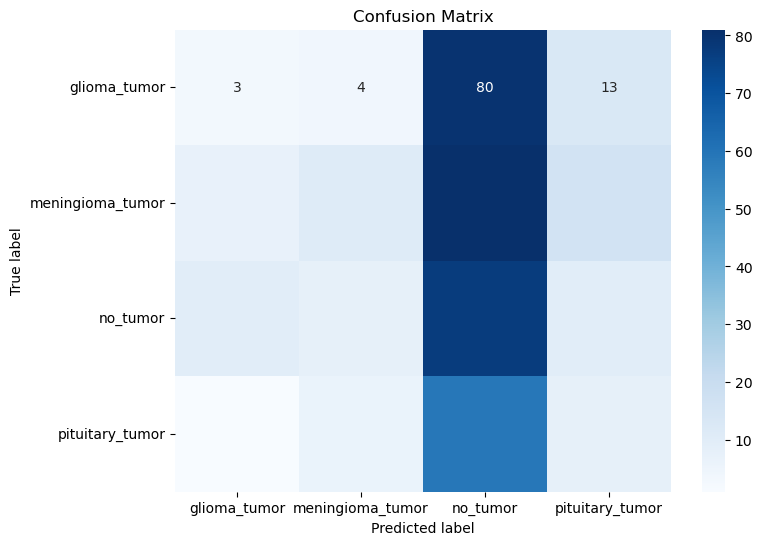

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


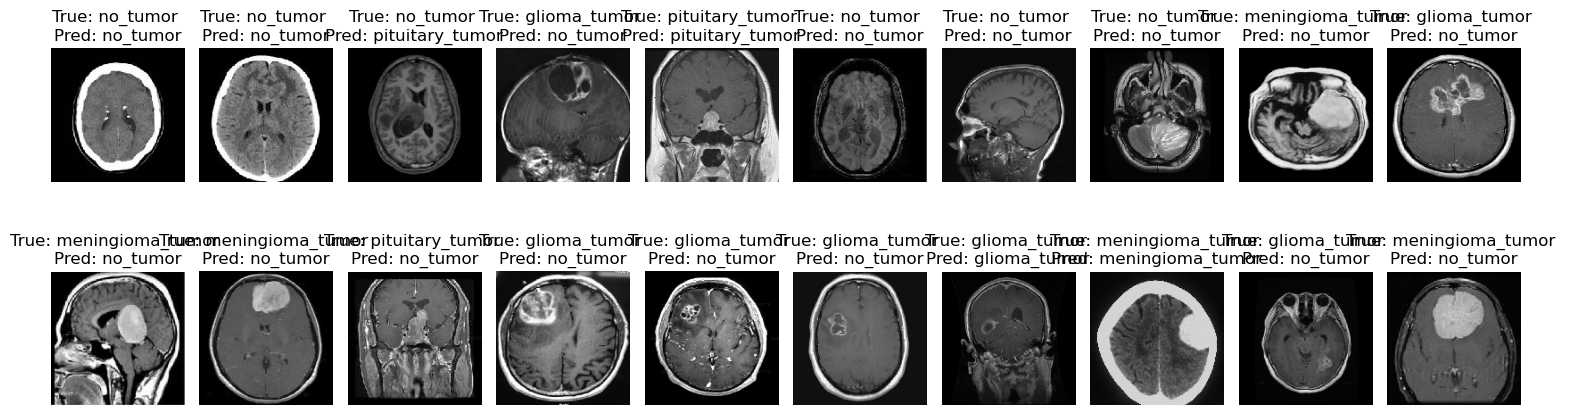

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 2: Loading and Preprocessing the Image Data
train_dir = 'Training'
test_dir = 'Testing'

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Step 3: Defining the Model’s Architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Training the Model
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=test_generator,
    validation_steps=validation_steps
)

# Step 5: Estimating the Model’s Performance
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

print(classification_report(true_classes, predicted_classes, target_names=train_generator.class_indices.keys()))

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Visualization of Predictions
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]} \nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 70s 686ms/step - accuracy: 0.5351 - loss: 1.1339 - val_accuracy: 0.3046 - val_loss: 1.9354
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 65s 696ms/step - accuracy: 0.7524 - loss: 0.6339 - val_accuracy: 0.4873 - val_loss: 1.8835
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 62s 656ms/step - accuracy: 0.8177 - loss: 0.4764 - val_accuracy: 0.5609 - val_loss: 2.1590
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 586ms/step - accuracy: 0.8821 - loss: 0.3318 - val_accuracy: 0.6675 - val_loss: 1.8697
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 573ms/step - accuracy: 0.9016 - loss: 0.2429 - val_accuracy: 0.6777 - val_loss: 2.2621
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 570ms/step - accuracy: 0.9344 - loss: 0.1744 - val_accuracy: 0.6827 - val_loss: 2.4247
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 569ms/step - accuracy: 0.9417 - loss: 0.1440 - val_accuracy: 0.6523 - val_loss: 3.1166
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 592ms/step - accuracy: 0.9667 - loss: 0.1052 - val_accuracy: 0.715

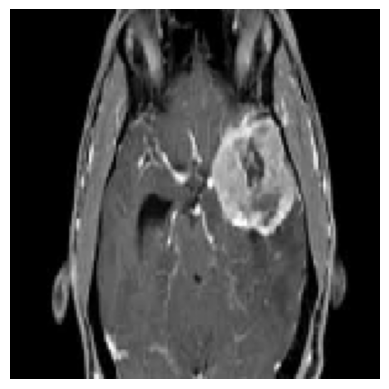

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
The model predicts: no_tumor


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image  # Import the image functions
import numpy as np

# Path to dataset
train_dir = 'Training'  # Train directory
test_dir = 'Testing'      # Test directory

#Define image dimensions
img_width, img_height = 150, 150

# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for getting correct labels
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)  # Get the predicted class indices
print(predicted_classes)

def preprocess_image(img_path, img_width, img_height):
    img = image.load_img(img_path, target_size=(img_width, img_height))  # Load and resize image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

img_path = r'Testing\meningioma_tumor\image(5).jpg'
preprocessed_img = preprocess_image(img_path, img_width, img_height)

plt.imshow(image.load_img(img_path, target_size=(img_width, img_height)))
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
prediction = model.predict(preprocessed_img)

# Get the predicted class index
predicted_class = np.argmax(prediction, axis=1)

# Class labels
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor']

# Get the class label for the predicted class
predicted_label = class_labels[predicted_class[0]]

# Output the prediction
print(f'The model predicts: {predicted_label}')



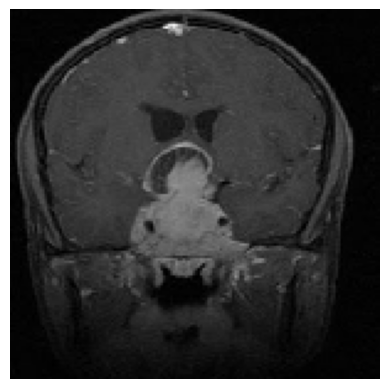

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
The model predicts: pituitary_tumor


In [13]:
img_path = r'Testing\\pituitary_tumor\image(7).jpg'
preprocessed_img = preprocess_image(img_path, img_width, img_height)

plt.imshow(image.load_img(img_path, target_size=(img_width, img_height)))
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
prediction = model.predict(preprocessed_img)

# Get the predicted class index
predicted_class = np.argmax(prediction, axis=1)

# Class labels
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor']

# Get the class label for the predicted class
predicted_label = class_labels[predicted_class[0]]

# Output the prediction
print(f'The model predicts: {predicted_label}')